SCATTERPLOTS

Your first requirement is to create a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude


To generate a random float number between any two numbers, we can use random.uniform(start,stop)

In [1]:
#Dependencies
import requests 
import json
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import time
import numpy as np

In [2]:
#####TEST (PERTH CITY) to see json info, and define variables to extract for y-axis: Temperature(F), Latitude Humidity, Cloudiness, Windspeed, x-axis: Latitude####

#Request and get URL, and transform to JSON. 
#For units, use "imperial" as farenheit has been requested in project.
deg="\xb0" #degree sign
city="sydney"
units="imperial"
url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
######Define variable "weather" and read the json file
weather=requests.get(url).json()
####Print the output of JSON formatted
#print(json.dumps(weather, indent=4, sort_keys=True))

####VARIABLES AND ITS VALUES FOR Y-AXIS###
#if set to imperial, units as follows
#Temp (F) 
print(weather["main"]["temp"], "Farenheit")
#Latitude Humidity
print(weather["main"]["humidity"], "% Humidity")
#Cloudiness (%)
print(weather["clouds"]["all"], "% Cloudiness")
#Windspeed (miles/hr)
print(weather["wind"]["speed"], "miles/hr")
# print("miles/hr")
####VARIABLES AND ITS VALUES FOR X-AXIS###
#latitude
print(weather["coord"]["lat"],deg,"latitude")
###OTHER VARIABLES####
#longitude
print(weather["coord"]["lon"],deg,"longitude")

74.52 Farenheit
78 % Humidity
0 % Cloudiness
7.81 miles/hr
-33.8679 ° latitude
151.2073 ° longitude


In [7]:
########JSON DATA #########
#base_url
base_url="http://api.openweathermap.org/data/2.5/weather?"

#######################

#Set up empty lists (for filling in in the for loop). Avoid using variables with same names as in API
 # Latitude, Longitude, Temperature(F), Latitude Humidity, Cloudiness, Windspeed
lat_list=[] #Latitude (°)
long_list=[] #Longitude (°)
city_list=[] #city name
temp_list=[] #Temperature(F)
lat_hum_list=[] #Latitude Humidity
cloud_list=[] #Cloudiness
winds_list=[] #windspeed

for x in range(20):
    #Random pick of latitude between -90 and 90 deg
    #Save latitudes into list "lat_list" 
    latitude=random.uniform(-90,90)
    lat_list.append(latitude)
    #Random pick of latitude between -180 and 180 deg
    #Save latitudes into list "lat_list" 
    longitude=random.uniform(-180,180)
    long_list.append(longitude)
    #Find the nearest city based on the random latitude and longitude variable
    city=citipy.nearest_city(latitude, longitude).city_name
    city_list.append(city)
    print(city)
    ####FOR THE CITY (in each loop), find variable values via JSON Data
    #Variable for query url. "imperial":farenheit, "metric":celcius, "":kelvin. 
    #Use "imperial" as farenheit has been requested in project.
    units="imperial"
    # print(city)
    #query url
    query_url=f"{base_url}appid={weather_api_key}&units={units}&q={city}"
    ######Define variable "weather" and read the json file
    weather=requests.get(query_url).json()
    try:
        temperature=weather["main"]["temp"]
        print(f" Temperature: {temperature}") 
        temp_list.append(temperature)  
    except KeyError:
        print(f"Likely the temp, main did not work in the API site")
        temperature=np.nan
        temp_list.append(temperature)
        # tempearture=int(None)
        pass   

    #Find latitude humidity (%)
    try:
        lat_hum=weather["main"]["humidity"]
        print(f" Lat Humidity: {lat_hum}")
        lat_hum_list.append(lat_hum)
    except KeyError:
        print(f"Likely the lat_hum, main did not work in the API site")
        lat_hum=np.nan
        lat_hum_list.append(lat_hum)
        # lat_hum_list=int(None)
        pass

    #Cloudiness (%)
    try:
        cloud=weather["clouds"]["all"]
        print(f" Cloud %: {cloud}")
        cloud_list.append(cloud)
    except KeyError:
        print(f"Likely the clouds did not work in the API site")
        cloud=np.nan
        cloud_list.append(cloud)
        # cloud=int(None)
        pass
    

    #Windspeed (miles/hr)
    try:
        winds=weather["wind"]["speed"]
        print(f" Wind Speed: {winds}")
        winds_list.append(winds)
    except KeyError:
        print(f"Likely the winds did not work in the API site")
        winds=np.nan
        winds_list.append(cloud)
        # winds=int(None)
        pass
    
    
    
    # #Slows server down to prevent it from blocking the retrieval of information
    # time.sleep(0.5)


    # #Request and get URL, and transform to JSON. 
    # #For units, use "imperial" as farenheit has been requested in project.
    # deg="\xb0" #degree sign
    # city="London"
    # units="imperial"
    # url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    # ######Define variable "weather" and read the json file
    # weather=requests.get(url).json()

####PRINT THE FOLLOWING TO TEST #####
# print(lat_list)
# print(long_list)
# print(city_list)
# print(temp_list)
# print(lat_hum_list)
# print(cloud_list)
# print(winds_list)

#Create a dataframe from the lists created 
weather_dict={
    "City Name":city_list, 
    "Latitude":lat_list, 
    "Longitude":long_list,
    "Temperature": temp_list,
    "Latitude Humidity": lat_hum_list,
    "Cloudiness": cloud_list,
    "Wind Speed": winds_list
    }

weather_data = pd.DataFrame(weather_dict)
weather_data

tiksi
 Temperature: -35.21
 Lat Humidity: 81
 Cloud %: 100
 Wind Speed: 12.86
saldanha
 Temperature: 86
 Lat Humidity: 45
 Cloud %: 39
 Wind Speed: 17.27
port-gentil
 Temperature: 77
 Lat Humidity: 94
 Cloud %: 40
 Wind Speed: 13.8
kununurra
 Temperature: 80.6
 Lat Humidity: 100
 Cloud %: 100
 Wind Speed: 5.75
mecca
 Temperature: 81.46
 Lat Humidity: 37
 Cloud %: 0
 Wind Speed: 8.99
ushuaia
 Temperature: 53.6
 Lat Humidity: 47
 Cloud %: 40
 Wind Speed: 5.75
albany
 Temperature: 34.16
 Lat Humidity: 64
 Cloud %: 89
 Wind Speed: 9.19
malanje
 Temperature: 77.04
 Lat Humidity: 67
 Cloud %: 87
 Wind Speed: 4
yellowknife
 Temperature: -20.2
 Lat Humidity: 76
 Cloud %: 90
 Wind Speed: 6.91
nikolskoye
 Temperature: 29.07
 Lat Humidity: 93
 Cloud %: 90
 Wind Speed: 8.95
upernavik
 Temperature: 18.37
 Lat Humidity: 87
 Cloud %: 32
 Wind Speed: 6.87
salalah
 Temperature: 80.6
 Lat Humidity: 28
 Cloud %: 85
 Wind Speed: 11.5
vestmannaeyjar
 Temperature: 28.4
 Lat Humidity: 64
 Cloud %: 0
 Wind Sp

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
0,tiksi,83.361988,128.288322,-35.21,81.0,100.0,12.86
1,saldanha,-39.868800,3.143055,86.00,45.0,39.0,17.27
2,port-gentil,-0.233287,7.478653,77.00,94.0,40.0,13.80
3,kununurra,-17.148356,130.345364,80.60,100.0,100.0,5.75
4,mecca,21.702766,40.417838,81.46,37.0,0.0,8.99
5,ushuaia,-70.828091,-72.880597,53.60,47.0,40.0,5.75
6,albany,-79.247669,97.141702,34.16,64.0,89.0,9.19
7,malanje,-8.718248,18.211271,77.04,67.0,87.0,4.00
8,yellowknife,67.146881,-104.962456,-20.20,76.0,90.0,6.91
9,nikolskoye,53.262078,168.095974,29.07,93.0,90.0,8.95


Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude
Southern Hemisphere - Temperature (F) vs. Latitude
Northern Hemisphere - Humidity (%) vs. Latitude
Southern Hemisphere - Humidity (%) vs. Latitude
Northern Hemisphere - Cloudiness (%) vs. Latitude
Southern Hemisphere - Cloudiness (%) vs. Latitude
Northern Hemisphere - Wind Speed (mph) vs. Latitude
Southern Hemisphere - Wind Speed (mph) vs. Latitude

#Create dataframe for northern hemisphere cities using boolean, test latitude > 0 degrees
#Create dataframe for northern hemisphere cities using boolean, test latitude < 0 degrees

#Plot a scatter graph and do the linear regression (line of best fit and Pearson's r value)

Scatter plots of 500 cities

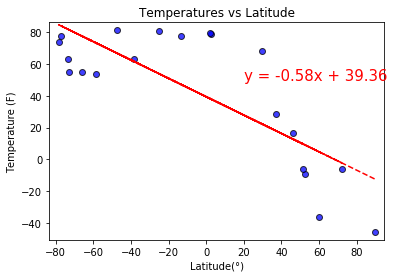

In [4]:
###Create scatter plot of Temperature(F) vs Latitude(°)

#Use dataframe from previous cell: weather_merged
weather_data

# Add the linear regression equation and line to plot
x_values = weather_data["Latitude"]
y_values = weather_data["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make a scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
# The y limits of our scatter plot 
plt.ylim(min(y_values)-5, max(y_values)+5)
# The x limits of our scatter plot 
plt.xlim(min(x_values)-5, max(x_values)+5)
#Plot linear regression model
plt.plot(x_values,regress_values,"--",color="red")
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
#Label title, x-axis and y-axis
plt.title("Temperatures vs Latitude")
plt.xlabel("Latitude(°)")
plt.ylabel("Temperature (F)")
plt.show()

In [5]:
#Create dataframe from main dataframe "weather_data" and filter for only northern hemisphere city data (Latitude>0°)
north_df=weather_data[weather_data["Latitude"]>0]
north_df

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
0,chokurdakh,89.463266,143.709217,-45.56,78,40,0.67
2,shache,37.183849,76.550375,28.36,82,87,5.23
5,hambantota,2.543291,86.159150,78.80,94,22,4.61
6,sioux lookout,52.465272,-90.994103,-9.40,84,75,5.75
7,las palmas,29.749663,-15.147999,68.00,83,75,10.36
8,ereymentau,51.631058,72.610339,-6.00,90,100,19.01
10,nefteyugansk,60.027662,72.796083,-36.40,67,42,8.95
16,butaritari,2.017425,166.666085,79.32,83,96,7.96
18,clyde river,71.933094,-78.890268,-5.80,92,75,2.51
19,pembroke,46.020563,-77.079731,16.45,73,90,12.66


In [6]:
#Create dataframe from main dataframe "weather_data" and filter for only southern hemisphere city data (Latitude<0°)
south_df=weather_data[weather_data["Latitude"]<0]
south_df

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
1,atuona,-13.177230,-131.634308,77.76,79,0,16.40
3,puerto ayora,-24.951272,-105.243044,80.38,65,40,9.22
4,punta arenas,-65.745331,-95.758335,55.20,41,40,24.16
9,port alfred,-78.395525,48.075244,73.99,89,6,4.00
11,busselton,-73.403432,76.304532,63.00,78,0,7.92
12,punta arenas,-72.973542,-102.493319,55.20,41,40,24.16
13,rawson,-47.361544,-58.421531,81.09,27,0,8.70
14,busselton,-38.513716,87.834205,63.00,78,0,7.92
15,rikitea,-76.908863,-131.849215,77.83,75,88,15.52
17,ushuaia,-58.301036,-55.372437,53.60,47,40,5.75
